### kaggle 데이터 다운로드

In [2]:
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0




  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|▏         | 1.00M/66.0M [00:00<00:21, 3.21MB/s]
  5%|▍         | 3.00M/66.0M [00:00<00:10, 6.36MB/s]
  8%|▊         | 5.00M/66.0M [00:00<00:07, 8.23MB/s]
 11%|█         | 7.00M/66.0M [00:00<00:06, 9.49MB/s]
 14%|█▎        | 9.00M/66.0M [00:01<00:05, 10.3MB/s]
 17%|█▋        | 11.0M/66.0M [00:01<00:05, 10.8MB/s]
 20%|█▉        | 13.0M/66.0M [00:01<00:04, 11.1MB/s]
 23%|██▎       | 15.0M/66.0M [00:01<00:04, 11.3MB/s]
 26%|██▌       | 17.0M/66.0M [00:01<00:04, 11.2MB/s]
 29%|██▉       | 19.0M/66.0M [00:01<00:04, 11.0MB/s]
 32%|███▏      | 21.0M/66.0M [00:02<00:04, 11.6MB/s]
 35%|███▍      | 23.0M/66.0M [00:02<00:03, 11.7MB/s]
 38%|███▊      | 25.0M/66.0M [00:02<00:03, 11.4MB/s]
 41%|████      | 27.0M/66.0M [00:02<00:03, 11.5MB/s]
 44%|████▍     | 29.0M/66.0M [00:02<00:03, 11.7MB/s]
 47%|████▋     | 31.0M/66.0M [00:03<00:03, 11.6MB/s]
 50%|█████     | 33.0M/66.0M [00:03<00:03, 11.4MB/s]
 53%|█████▎    | 35.0M/66.0M [00:03<00:02, 11.6MB/s]
 

### 라이브러리 불러오기

In [106]:
import pandas as pd
import numpy as np

from matplotlib import rc
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

In [109]:
font_path = 'C:/Users/YJ/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Black.ttf'

font_prop = font_manager.FontProperties(fname = font_path)
rc('font', family = font_prop.get_name())

plt.rcParams['axes.unicode_minus'] = False

In [67]:
warnings.filterwarnings('ignore')

card_df = pd.read_csv('./kaggle_data/creditcard/creditcard.csv')

In [10]:
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [11]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 데이터 전처리

In [68]:
### 불필요한 컬럼 삭제
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # TIME 피처의 경우에는 의미가 없어 제거
    df_copy.drop('Time'
                 , axis = 1
                 , inplace = True
                 )
    
    return df_copy

In [69]:
### 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df = None):
    
    # 인자로 입력된  DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)

    # DataFame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy[df_copy.columns[:-1]]
    y_target = df_copy[df_copy.columns[-1]]

    # 학습 및 테스트 데이터 분할, stratify = y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features
                     , y_target
                     , test_size = 0.3
                     , random_state = 0
                     , stratify = y_target
                     )
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [70]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    
    print(f"{'*'*50}")
    print(f'혼동행렬')
    print(f'{confusion}')
    print(f'''
    정확도 : {accuracy}
    정밀도 : {precision}
    재현율 : {recall}
    f1 : {f1}
    AUC : {auc}
    ''')
    print(f"{'*'*50}")

### 로지스틱 회귀 모델

In [71]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

**************************************************
혼동행렬
[[85280    15]
 [   56    92]]

    정확도 : 0.99916903666772
    정밀도 : 0.8598130841121495
    재현율 : 0.6216216216216216
    f1 : 0.7215686274509804
    AUC : 0.81072288068595
    
**************************************************


### LGBM 모델

In [72]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [73]:
lgbm_clf = LGBMClassifier(n_esetimators = 1000
                          , num_leaves = 64
                          , n_jobs = -1
                          , boost_from_average = False)

get_model_train_eval(lgbm_clf
                     , ftr_train=X_train
                     , ftr_test = X_test
                     , tgt_train = y_train
                     , tgt_test = y_test
                     )

**************************************************
혼동행렬
[[85289     6]
 [   38   110]]

    정확도 : 0.9994850368081645
    정밀도 : 0.9482758620689655
    재현율 : 0.7432432432432432
    f1 : 0.8333333333333333
    AUC : 0.8715864495716773
    
**************************************************


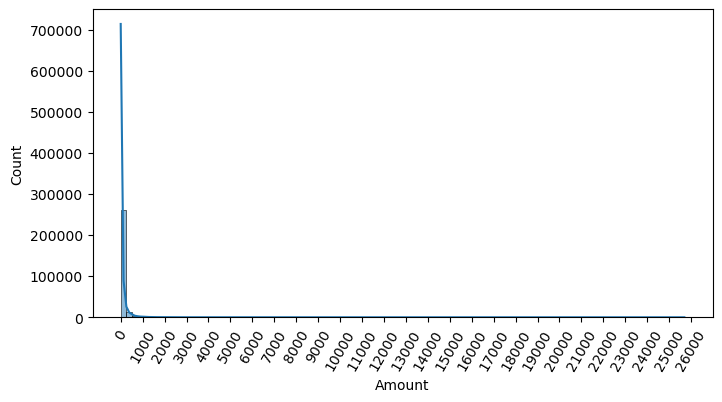

In [74]:
plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.histplot(card_df['Amount']
             , bins = 100
             , kde = True
             )

plt.show()

In [75]:
# 사이킷런 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame 맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)

    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)

    return df_copy

In [76]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_Clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf
                     , ftr_train = X_train
                     , ftr_test = X_test
                     , tgt_train = y_train
                     , tgt_test = y_test)


print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000
                          
                          , num_leaves = 64
                          , n_jobs = -1
                          , boost_from_average = False
                          )

get_model_train_eval(lgbm_clf
                     , ftr_train= X_train
                     , ftr_test = X_test
                     , tgt_train = y_train
                     , tgt_test = y_test
                     )

### 로지스틱 회귀 예측 성능 ###
**************************************************
혼동행렬
[[85281    14]
 [   58    90]]

    정확도 : 0.9991573329588147
    정밀도 : 0.8653846153846154
    재현율 : 0.6081081081081081
    f1 : 0.7142857142857144
    AUC : 0.8039719859375173
    
**************************************************
### LightGBM 예측 성능 ###
**************************************************
혼동행렬
[[85290     5]
 [   37   111]]

    정확도 : 0.9995084442259752
    정밀도 : 0.9568965517241379
    재현율 : 0.75
    f1 : 0.8409090909090909
    AUC : 0.8749706899583798
    
**************************************************


In [77]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()

    # 넘파이의 log1p()를 이용해 Amount를 로그로 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy

In [78]:
X_train, X_test, y_train, y_test = \
get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf
                     , ftr_train = X_train
                     , ftr_test = X_test
                     , tgt_train= y_train
                     , tgt_test= y_test
                     )

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf
                     , ftr_train = X_train
                     , ftr_test = X_test
                     , tgt_train = y_train
                     , tgt_test = y_test
                     )

### 로지스틱 회귀 예측 성능 ###
**************************************************
혼동행렬
[[85283    12]
 [   59    89]]

    정확도 : 0.99916903666772
    정밀도 : 0.8811881188118812
    재현율 : 0.6013513513513513
    f1 : 0.714859437751004
    AUC : 0.8006053315757872
    
**************************************************
### LightGBM 예측 성능 ###
**************************************************
혼동행렬
[[85290     5]
 [   35   113]]

    정확도 : 0.9995318516437859
    정밀도 : 0.9576271186440678
    재현율 : 0.7635135135135135
    f1 : 0.849624060150376
    AUC : 0.8817274467151365
    
**************************************************


<AxesSubplot:>

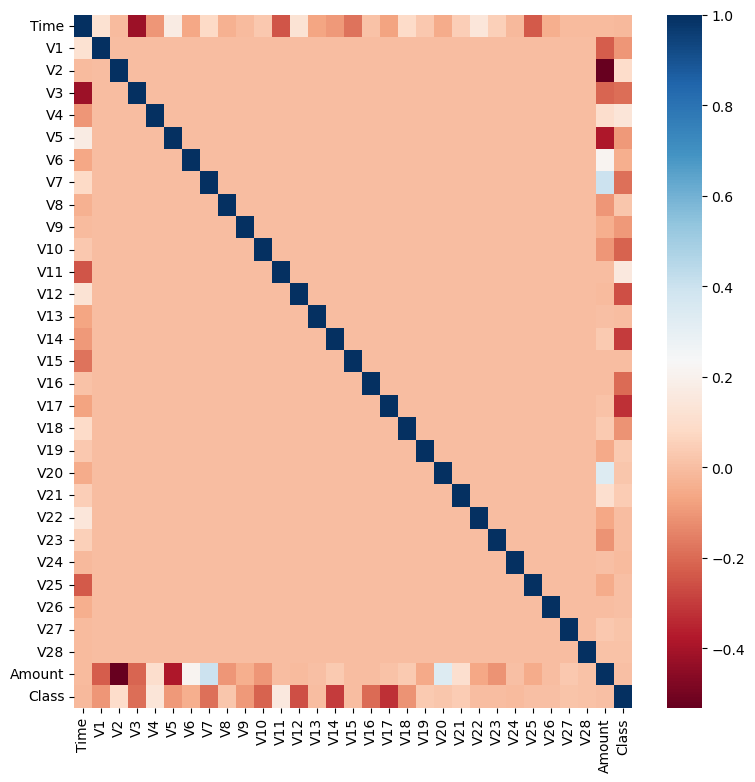

In [79]:
plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr
            , cmap = 'RdBu')

<AxesSubplot:>

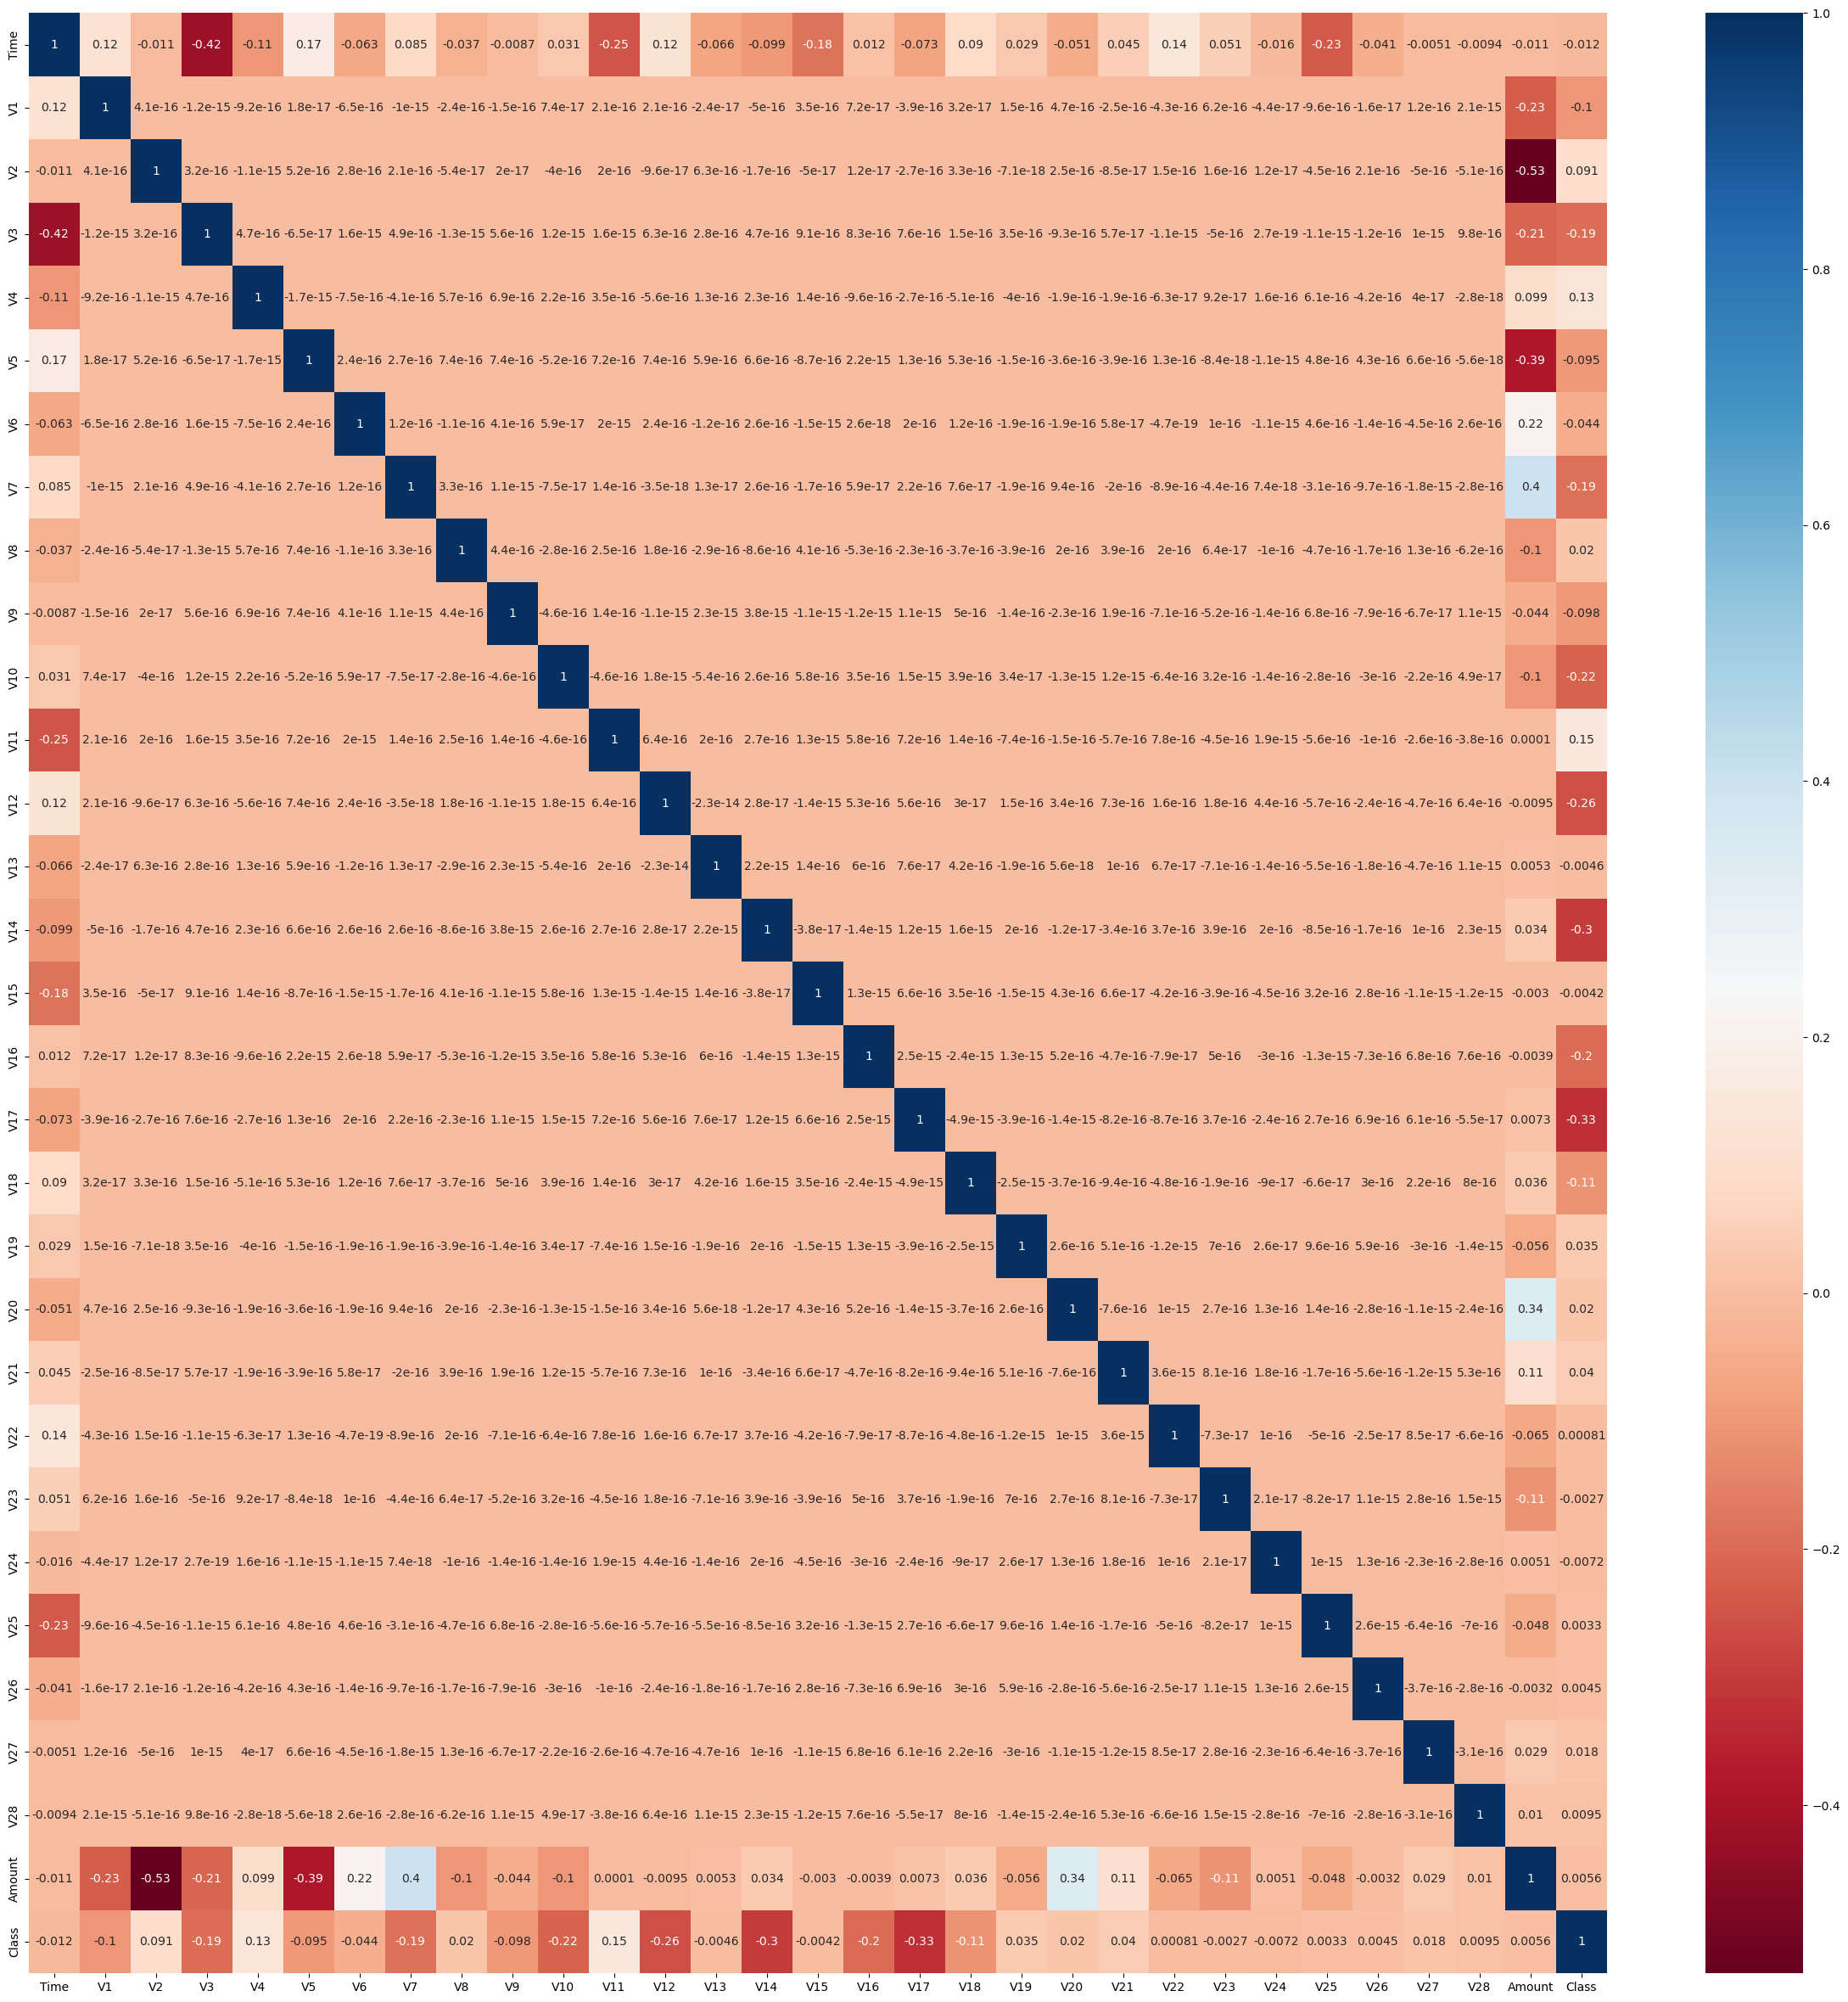

In [80]:
plt.figure(figsize = (30,30))
corr = card_df.corr()
sns.heatmap(corr
            , annot = True
            , cmap = 'RdBu')

In [81]:
def get_outlier(df = None, column = None, weight = 1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4분위와 3/5분위 지점을 np.percentile로 구함
    fraud = df[df['Class'] == 1][column]
    quantitle_25 = np.percentile(fraud.values, 25)
    quantitle_75 = np.percentile(fraud.values, 75)

    # IQR을 구하고, IQR에 1.5를 곱해, 최대값과 최소값 지점을 구함
    iqr = quantitle_75 - quantitle_25
    iqr_weight = iqr * weight
    lowest_val = quantitle_25 - iqr_weight
    highest_val = quantitle_75 + iqr_weight

    # 최대값보다 크거나, 최소값보다 작은 값을 이상치 데이터로 설정하고 DF index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [82]:
outlier_index = get_outlier(df=card_df
                            , column = 'V14'
                            , weight = 1.5
                            )

print('이상치 데이터 인덱스\n', outlier_index)

이상치 데이터 인덱스
 Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [83]:
# get_preprocessed_df()를 로그 변환 후, V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df  = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)

    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df = df_copy
                                , column = 'V14'
                                , weight = 1.5
                                )
    
    df_copy.drop(outlier_index, axis = 0, inplace = True)

    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf
                     , ftr_train = X_train
                     , ftr_test = X_test
                     , tgt_train = y_train
                     , tgt_test = y_test
                     )

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf
                     , ftr_train = X_train
                     , ftr_test = X_test
                     , tgt_train = y_train
                     , tgt_test = y_test
                     )


### 로지스틱 회귀 예측 성능 ###
**************************************************
혼동행렬
[[85281    14]
 [   48    98]]

    정확도 : 0.9992743530623471
    정밀도 : 0.875
    재현율 : 0.6712328767123288
    f1 : 0.7596899224806201
    AUC : 0.8355343702396276
    
**************************************************
### LightGBM 예측 성능 ###
**************************************************
혼동행렬
[[85290     5]
 [   25   121]]

    정확도 : 0.9996488805140389
    정밀도 : 0.9603174603174603
    재현율 : 0.8287671232876712
    f1 : 0.8897058823529411
    AUC : 0.9143542516022153
    
**************************************************


In [87]:
smote  = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print(f'SMOTE 적용 전 학습 데이터 SET : {X_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 학습 데이터 SET : {X_train_over.shape, y_train_over.shape}')
print(f'''
SMOTE 적용 후 레이블 값 분포
{pd.Series(y_train_over).value_counts()}
''')

SMOTE 적용 전 학습 데이터 SET : ((199362, 29), (199362,))
SMOTE 적용 후 학습 데이터 SET : ((398040, 29), (398040,))

SMOTE 적용 후 레이블 값 분포
0    199020
1    199020
Name: Class, dtype: int64



In [95]:
lr_clf = LogisticRegression(max_iter = 1000)

# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over과 y_train_over로 변경됨에 유의
print('LR 모델')
get_model_train_eval(lr_clf
                     , ftr_train = X_train_over
                     , ftr_test = X_test
                     , tgt_train = y_train_over
                     , tgt_test = y_test
                     )

LR 모델
**************************************************
혼동행렬
[[82937  2358]
 [   11   135]]

    정확도 : 0.9722732645919406
    정밀도 : 0.05415162454873646
    재현율 : 0.9246575342465754
    f1 : 0.10231148162182646
    AUC : 0.9485061514951734
    
**************************************************


In [92]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

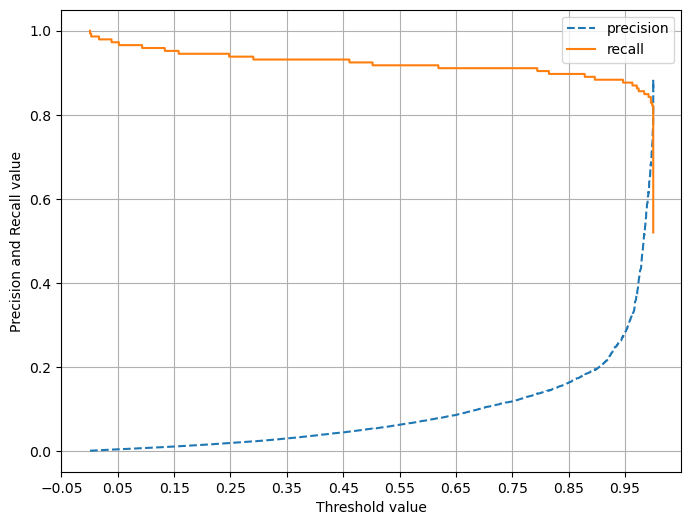

In [93]:
precision_recall_curve_plot(y_test
                            , lr_clf.predict_proba(X_test)[:, 1])

In [96]:
### LGBM에서 SMOTE
lgbm_clf = LGBMClassifier(n_estimators= 1000
                          , num_leaves=64
                          , n_jobs = -1
                          , boosting_from_average = False
                          )

print('LGBM 모델')
get_model_train_eval(lgbm_clf
                     , ftr_train = X_train_over
                     , ftr_test = X_test
                     , tgt_train = y_train_over
                     , tgt_test = y_test
                     )


LGBM 모델
**************************************************
혼동행렬
[[85283    12]
 [   22   124]]

    정확도 : 0.9996020645825775
    정밀도 : 0.9117647058823529
    재현율 : 0.8493150684931506
    f1 : 0.8794326241134752
    AUC : 0.9245871901466867
    
**************************************************


### 시각화 차트 그려보기

In [231]:
data = {
    "단계": [
        "무의미한 컬럼 1개 제거(Time)",
        "무의미한 컬럼 1개 제거(Time)",
        "Amount 피처를 정규화",
        "Amount 피처를 정규화",
        "Amount 피처를 log화",
        "Amount 피처를 log화",
        "이상치 제거",
        "이상치 제거",
        "SMOTE",
        "SMOTE"
    ],
    "알고리즘": [
        "LR", "LGBM", "LR", "LGBM", "LR", "LGBM", "LR", "LGBM", "LR", "LGBM"
    ],

    "평가_정확도": [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.97, 0.99],
    "평가_정밀도": [0.86, 0.95, 0.87, 0.95, 0.88, 0.96, 0.88, 0.96, 0.05, 0.91],
    "평가_재현율": [0.62, 0.74, 0.61, 0.75, 0.60, 0.76, 0.67, 0.83, 0.92, 0.85],
    "평가_f1": [0.72, 0.83, 0.71, 0.84, 0.71, 0.85, 0.76, 0.89, 0.10, 0.88],
    "평가_ROC": [0.81, 0.87, 0.80, 0.87, 0.80, 0.88, 0.84, 0.91, 0.95, 0.92]
}

tmp_df = pd.DataFrame(data)
tmp_df


,단계,알고리즘,평가_정확도,평가_정밀도,평가_재현율,평가_f1,평가_ROC
0,무의미한 컬럼 1개 제거(Time),LR,0.99,0.86,0.62,0.72,0.81
1,무의미한 컬럼 1개 제거(Time),LGBM,0.99,0.95,0.74,0.83,0.87
2,Amount 피처를 정규화,LR,0.99,0.87,0.61,0.71,0.80
3,Amount 피처를 정규화,LGBM,0.99,0.95,0.75,0.84,0.87
4,Amount 피처를 log화,LR,0.99,0.88,0.60,0.71,0.80
5,Amount 피처를 log화,LGBM,0.99,0.96,0.76,0.85,0.88
6,이상치 제거,LR,0.99,0.88,0.67,0.76,0.84
7,이상치 제거,LGBM,0.99,0.96,0.83,0.89,0.91
8,SMOTE,LR,0.97,0.05,0.92,0.10,0.95
9,SMOTE,LGBM,0.99,0.91,0.85,0.88,0.92


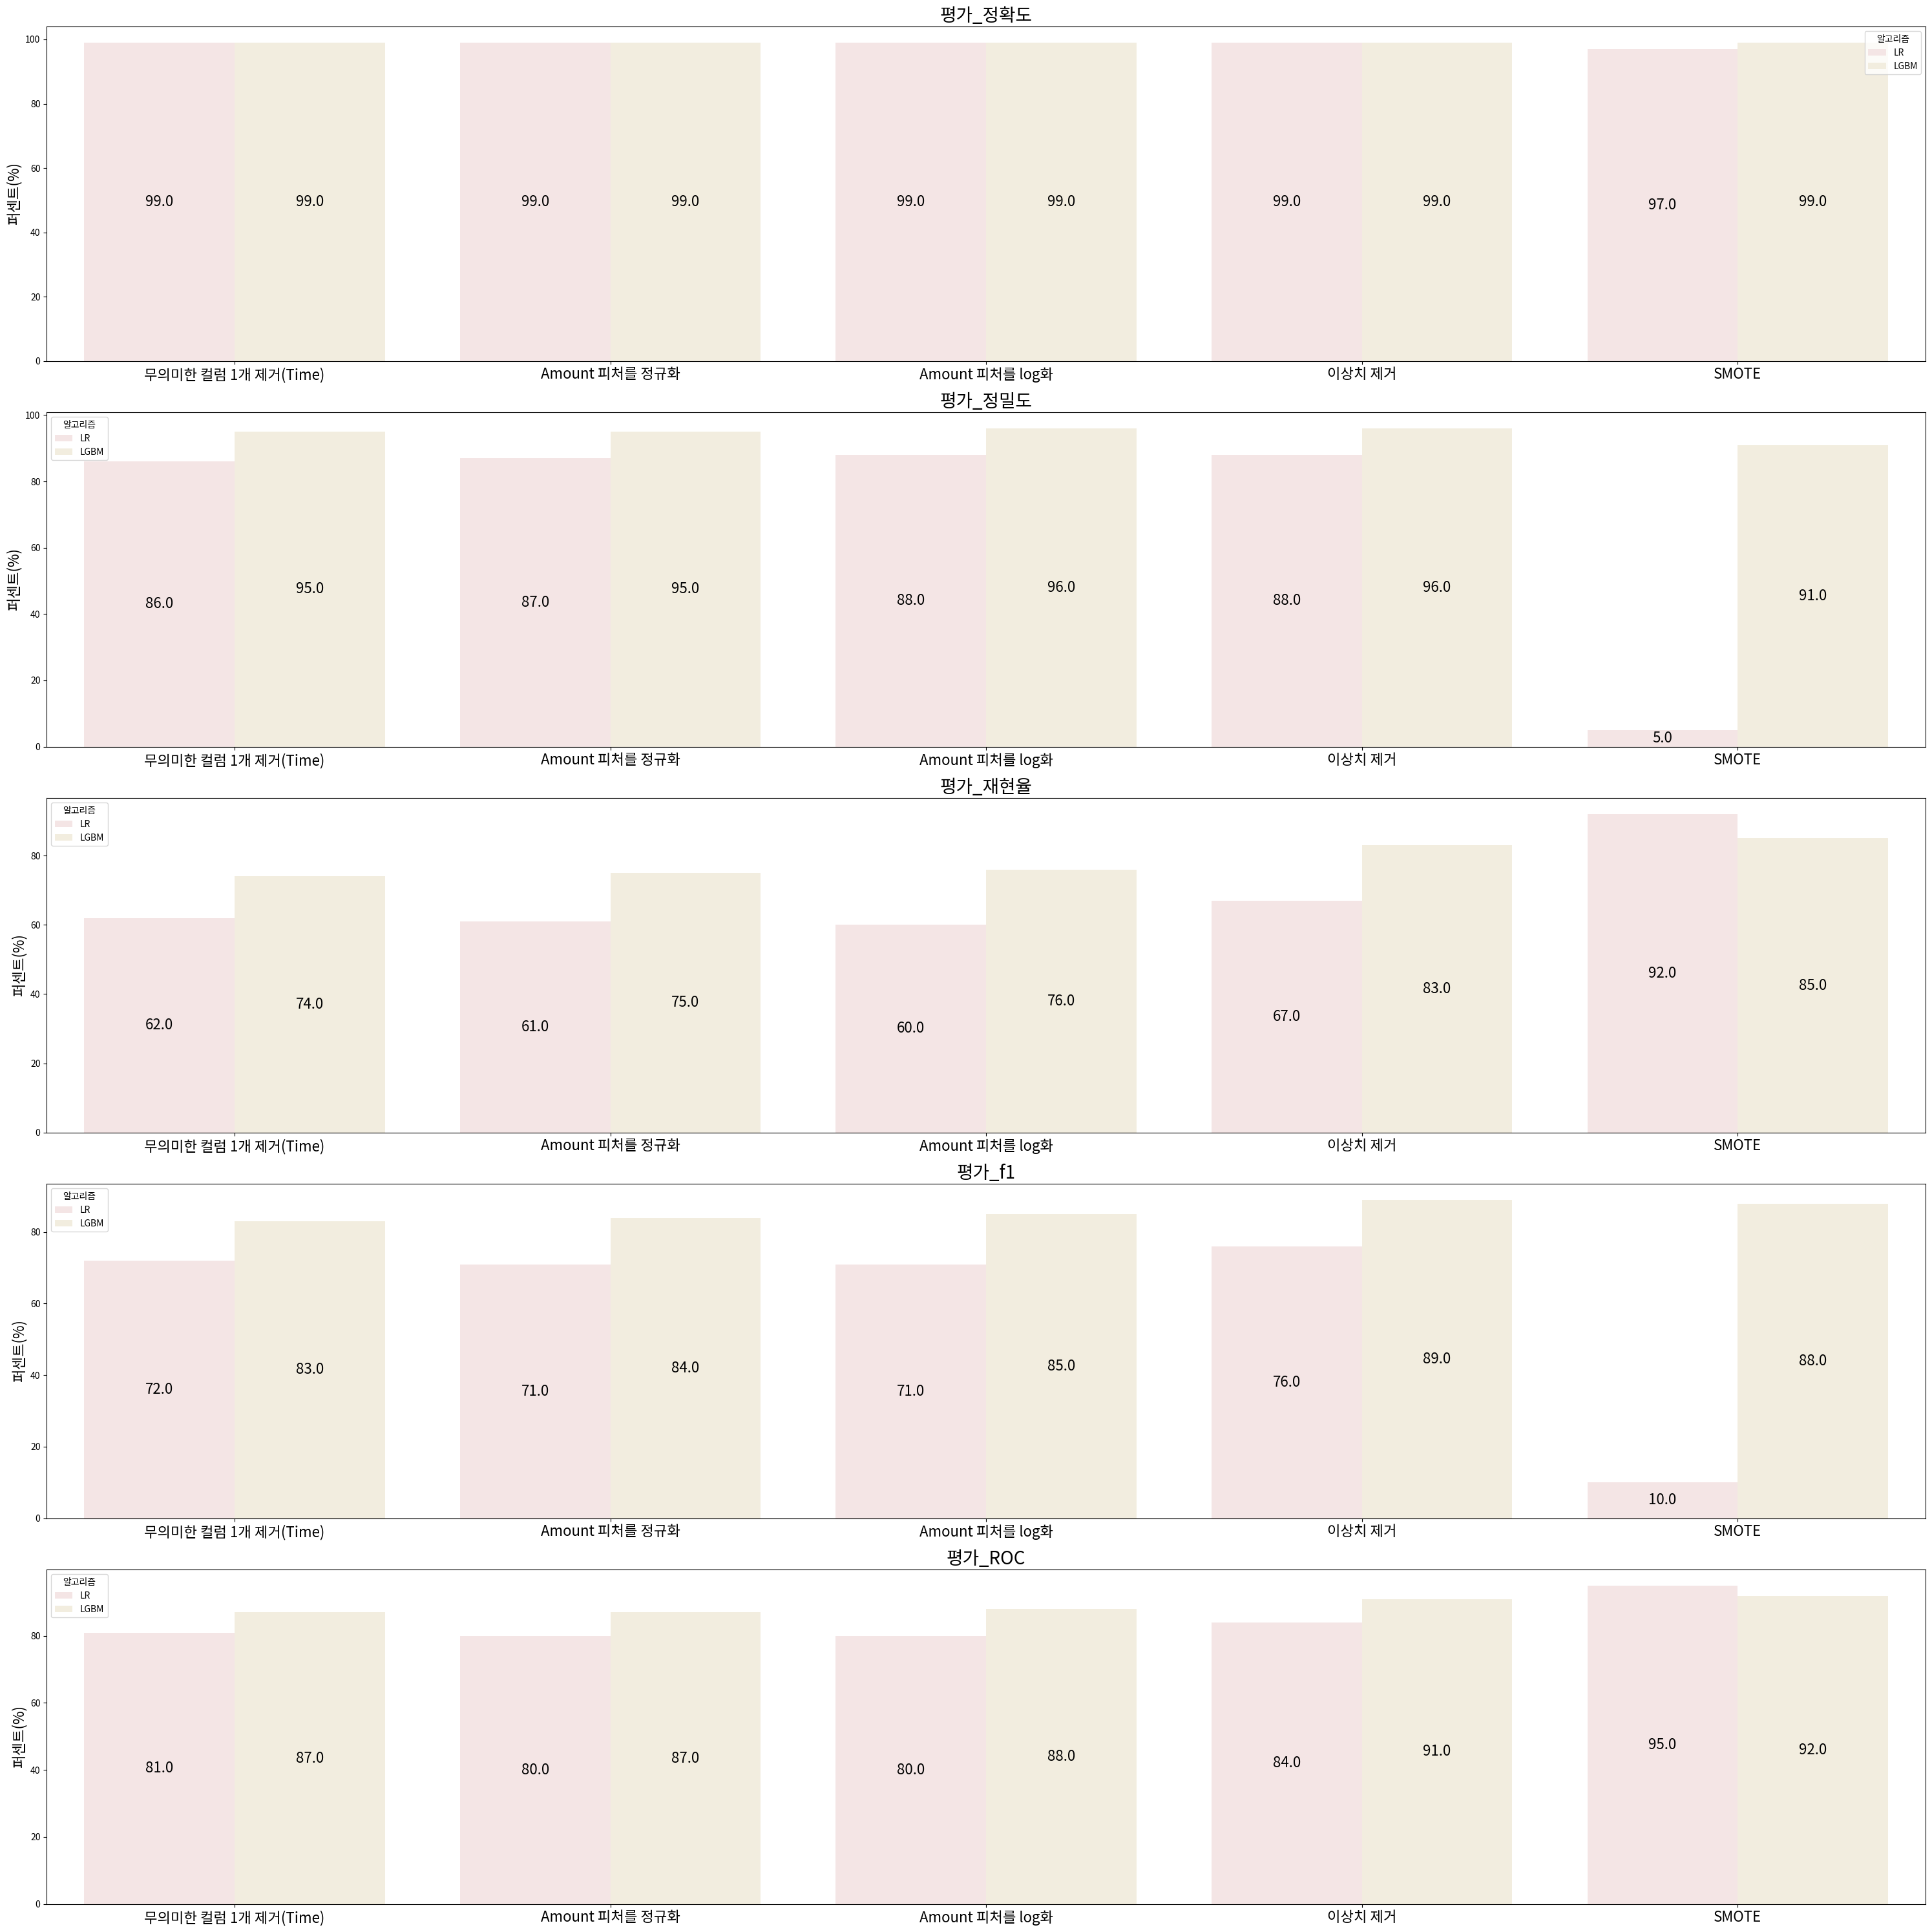

In [232]:
tmp_cols = [i for i in [i for i in tmp_df.columns] if '평가' in i]

plt.figure(figsize=(30,30))

for num, i in enumerate(tmp_cols):
    plt.subplot(len(tmp_cols), 1, num+1)
    sub_tmp_df = tmp_df.copy()
    sub_tmp_df[i] = sub_tmp_df[i] * 100
    sns.barplot(x = sub_tmp_df['단계']
                , y = sub_tmp_df[i]
                , hue = sub_tmp_df['알고리즘']
                , palette= {
                    'LR' : '#F7E2E2'
                    , 'LGBM' : '#F5EEDC'
                    }
                )
    plt.title(i, fontsize = 20)
    plt.ylabel('퍼센트(%)', fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.xlabel(None)


    for i in plt.gca().containers:
        plt.gca().bar_label(i
                            , fmt = '%.1f'
                            , label_type = 'center'
                            , fontsize = 16)

plt.tight_layout()
plt.show()

### 결론 성능 비교
사기 탐지에는 재현율이 중요 >> SMOTE / LGBM 추천  
정밀도와 재현율의 균형이 필요할 경우 >> 이상치 제거 / LGBM

|단계 |알고리즘| 혼동행렬 | 평가_정확도 | 평가_정밀도 | 평가_재현율 | 평가_f1 | 평가_ROC
|--|--|--|--|--|--|--| --|
|무의미한 컬럼 1개 제거(Time) |LR| [85280-15] <br> [--56---92] | 0.99 | 0.86 | 0.62 | 0.72 | 0.81|
|무의미한 컬럼 1개 제거(Time) |LGBM| [85289-6] <br> [--38---110]|0.99| 0.95 | 0.74 | 0.83 | 0.87|
|Amount 피처를 정규화|LR|[85281-14]<br>[--58---90]|0.99|0.87|0.61|0.71|0.80|
|Amount 피처를 정규화|LGBM|[85290-5] <br> [--37---111]|0.99|0.95|0.75|0.84|0.87|
|Amount 피처를 log화|LR|[85283-12]<br>[--59---89]|0.99|0.88|0.60|0.71|0.80|
|Amount 피처를 log화|LGBM|[85290-5]<br>[--35---113]|0.99|0.96|0.76|0.85|0.88|
|이상치 제거|LR|[85281-14]<br>[--48---98]|0.99|0.88|0.67|0.76|0.84|
|이상치 제거|LGBM|[85290-5]<br>[--25---121]|0.99|0.96|0.83|0.89|0.91|
|SMOTE|LR|[82937  2358]<br>[--11---135]|0.97|0.05|0.92|0.10|0.95|
|SMOTE|LGBM|[85283- 12]<br>[--22---124]|0.99|0.91|0.85|0.88|0.92|